In [1]:
from features_version.batch_create_feature import batch_create_features
from features_version.v1_feature import v1_feature
import logging
from logger_config import log_manager, get_module_logger
log_manager.set_levels(
    file_level=logging.WARNING,    # 文件记录详细信息
    console_level=logging.WARNING   # 控制台只显示重要信息
)
logger = get_module_logger()# 简洁模式 - v1_feature和batch_create_features都会使用简洁输出
batch_create_features("/mnt/d/UserData/lidonghaowsl/data/Stability_PS/raw", "/mnt/d/UserData/lidonghaowsl/data/Stability_PS/features", v1_feature)

处理: #20250804007-1-稳定性测试-test_20250815134210_290e653d....:   0%|          | 0/22 [00:00<?, ?文件/s]2025-08-31 17:58:53 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-2-稳定性测试-test_20250815134210_403dce1b....:   5%|▍         | 1/22 [00:08<03:06,  8.89s/文件, 成功=1, 失败=0, 进度=1/22]2025-08-31 17:59:02 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-3-稳定性测试-test_20250815134210_6b44fb0e....:   9%|▉         | 2/22 [00:17<02:58,  8.92s/文件, 成功=2, 失败=0, 进度=2/22]2025-08-31 17:59:11 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-4-稳定性测试-test_20250815134210_480af66c....:  14%|█▎        | 3/22 [00:26<02:47,  8.83s/文件, 成功=3, 失败=0, 进度=3/22]2025-08-31 17:59:19 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616


=== 批量处理完成 ===
✅ 成功: 22/22 个文件


In [ ]:
# from features_version.v1_feature import v1_feature

# print('=== 运行v1 ===')
# v1_file = v1_feature('/mnt/d/UserData/lidonghaowsl/data/Stability_PS/#20250804007-4-稳定性测试-test_20250815134210_480af66c.h5')

# print(f'\n最终文件: {v1_file}')

# 加载特征数据

In [1]:
import matplotlib.pyplot as plt
from chip_feature_plotter import ChipFeaturePlotter, plot_chip_feature

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plotter = ChipFeaturePlotter("/mnt/d/UserData/lidonghaowsl/data/Stability_PS/features/")

# 查看所有可用芯片
dir_stats = plotter.batch_manager.get_directory_statistics()
print(f"总文件数: {dir_stats['total_files']}")
print(f"芯片分布: {dir_stats['chip_distribution']}")


总文件数: 22
芯片分布: {'#20250804007': 6, '#20250804008': 6, '#20250825001': 5, '#20250825002': 5}


In [2]:

# 为每个芯片绘制相同特征
available_chips = list(dir_stats['chip_distribution'].keys())


In [3]:

# 找到所有芯片的共同特征
common_features = None
for chip_id in available_chips:
    chip_features = plotter.list_chip_features(chip_id)
    if common_features is None:
        common_features = set(chip_features)
    else:
        common_features &= set(chip_features)

common_features = list(common_features)
print(f"\n所有芯片的共同特征 ({len(common_features)} 个): {common_features}")



所有芯片的共同特征 (15 个): ['Von_forward', 'Von_reverse_Vg', 'Von_reverse_Id', 'absI_max_raw_Vg', 'Von_reverse', 'absI_max_raw', 'absgm_max_forward_Id', 'absgm_max_forward', 'absgm_max_reverse_Vg', 'absgm_max_reverse', 'absgm_max_forward_Vg', 'absgm_max_reverse_Id', 'absI_max_raw_Id', 'Von_forward_Vg', 'Von_forward_Id']


# absI_max_raw

2025-08-31 18:52:10 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250825001 的特征 absI_max_raw
2025-08-31 18:52:10 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 5 个特征文件
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 5 个设备的数据
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.43e-06 ~ 5.60e-04
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.60e-06 ~ 8.12e-04
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 18:52:11 - chip_feature_plotter - INFO - chip_feature_p

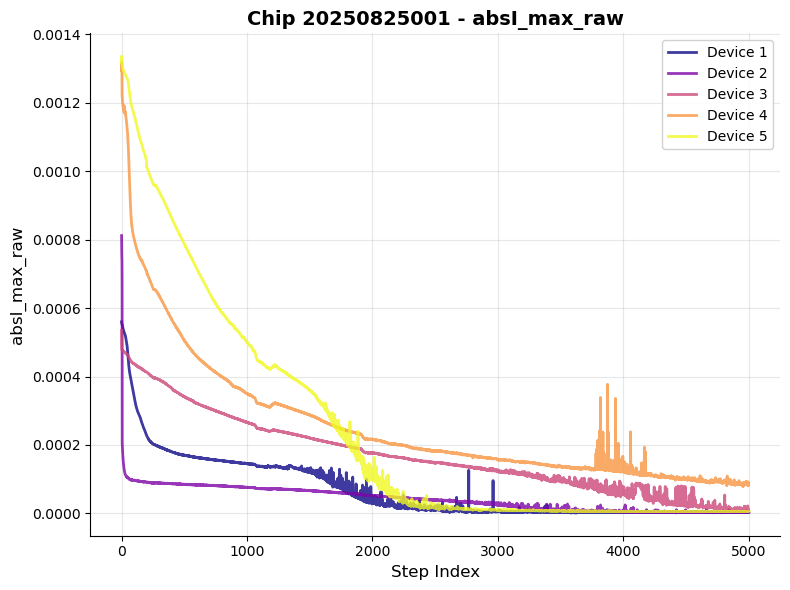

In [4]:
    
feature_name = 'absI_max_raw'
chip_id = '20250825001'
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


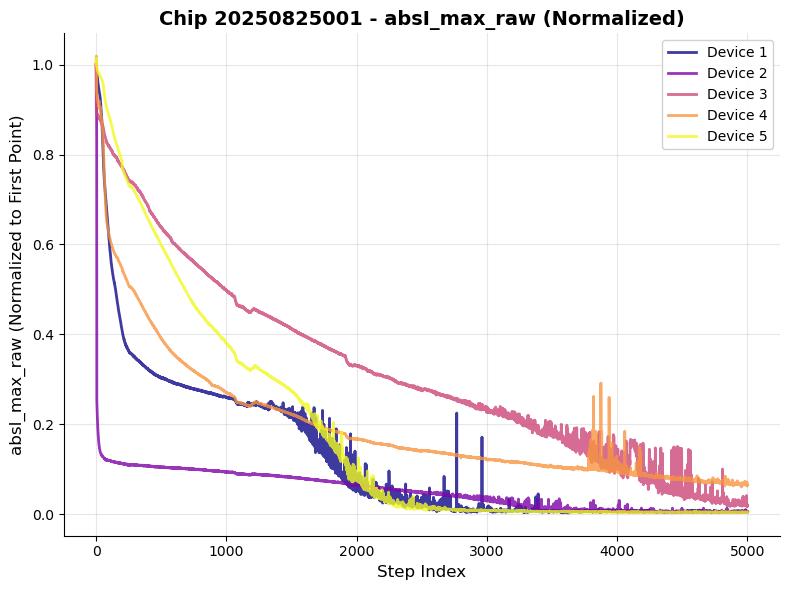

In [6]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250825001 的特征 absI_max_raw
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 5 个特征文件
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 5 个设备的数据
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5000 点
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.43e-06 ~ 5.56e-04
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5000 点
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.60e-06 ~ 7.62e-04
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5000 点
2025-08-31 18:53:18 - chip_feature_plotter - INFO - chip_feature_p

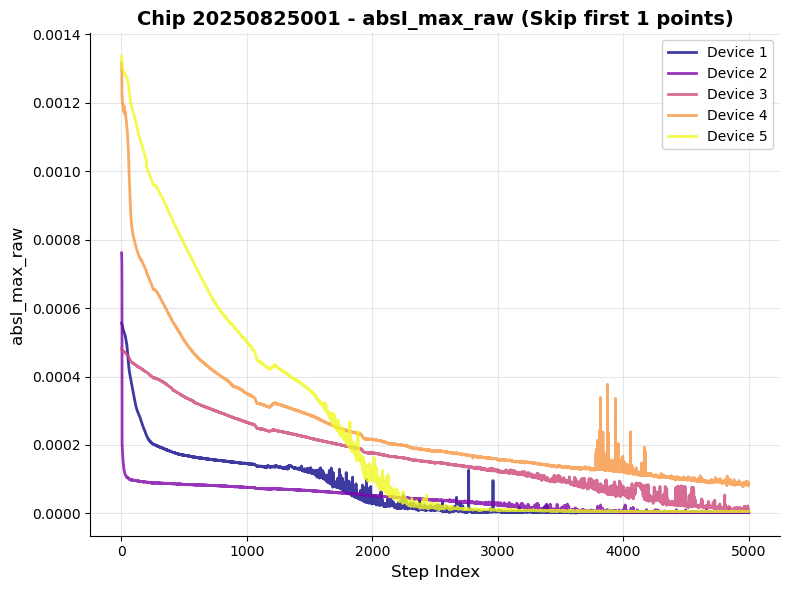

In [5]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


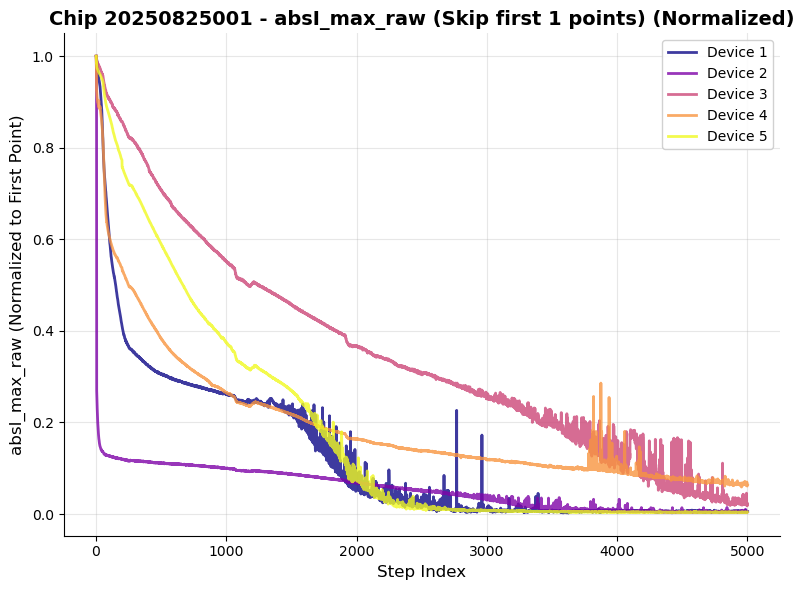

In [7]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


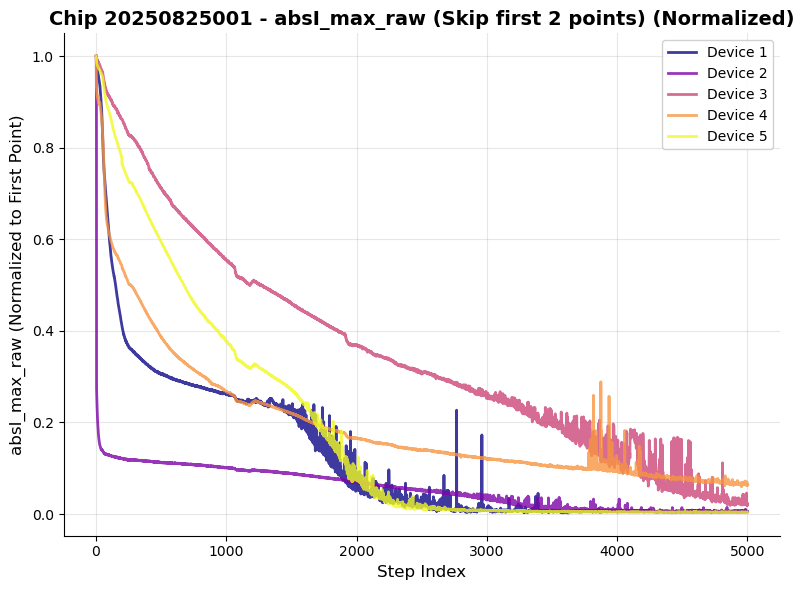

In [9]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=2,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250825001 的特征 absI_max_raw
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 5 个特征文件
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 5 个设备的数据
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.43e-06 ~ 5.51e-04
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.60e-06 ~ 2.05e-04
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 18:56:11 - chip_feature_plotter - INFO - chip_feature_p

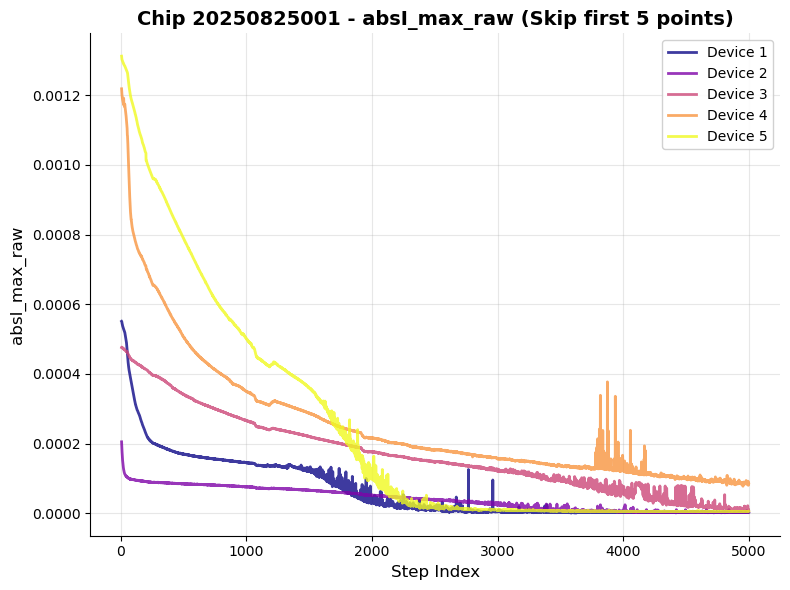

In [6]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


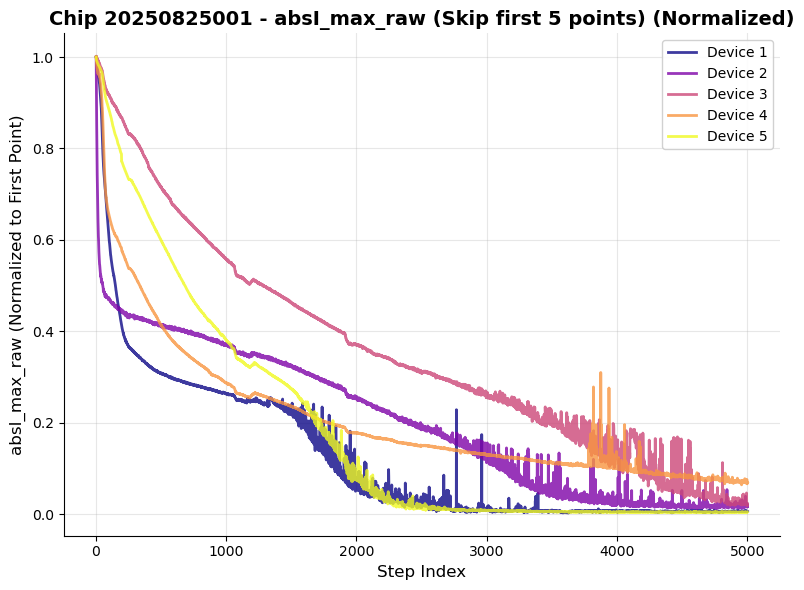

In [10]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


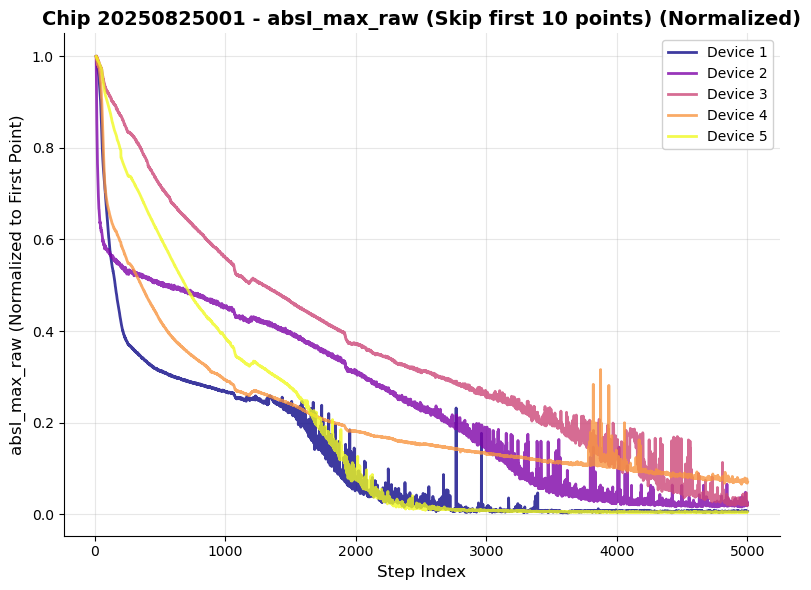

In [11]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=10,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


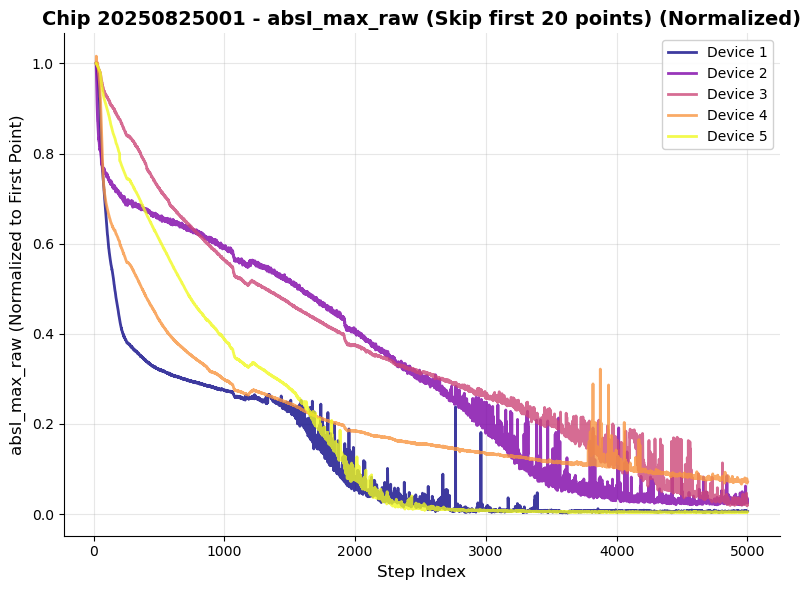

In [12]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=20,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


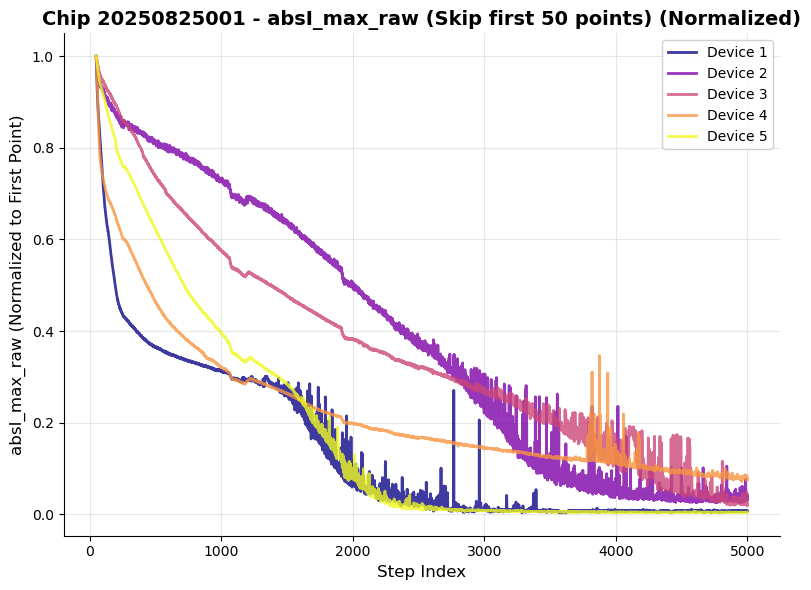

In [13]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=50,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


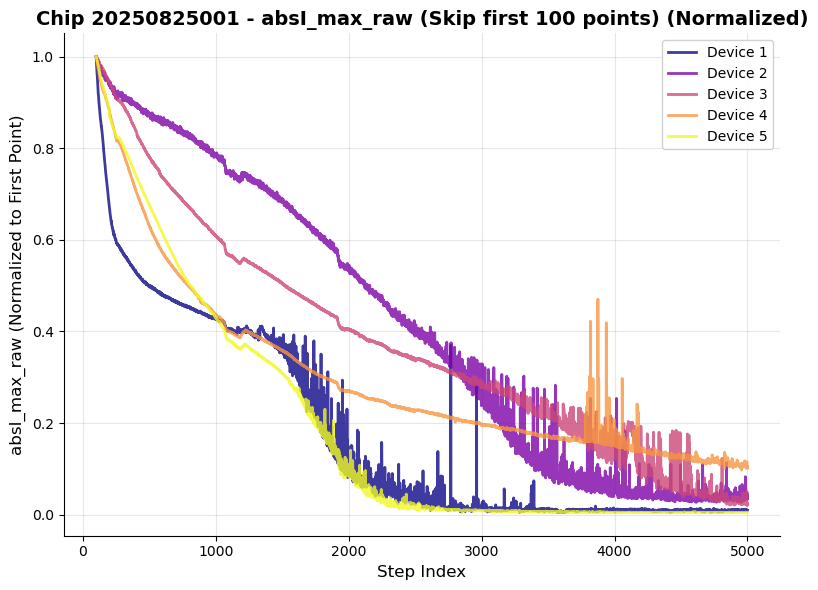

In [14]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=100,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


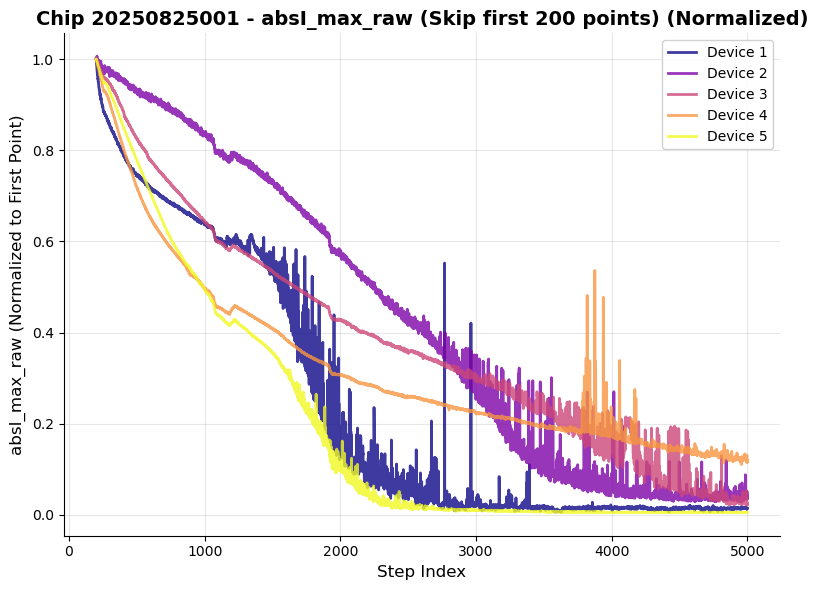

In [15]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


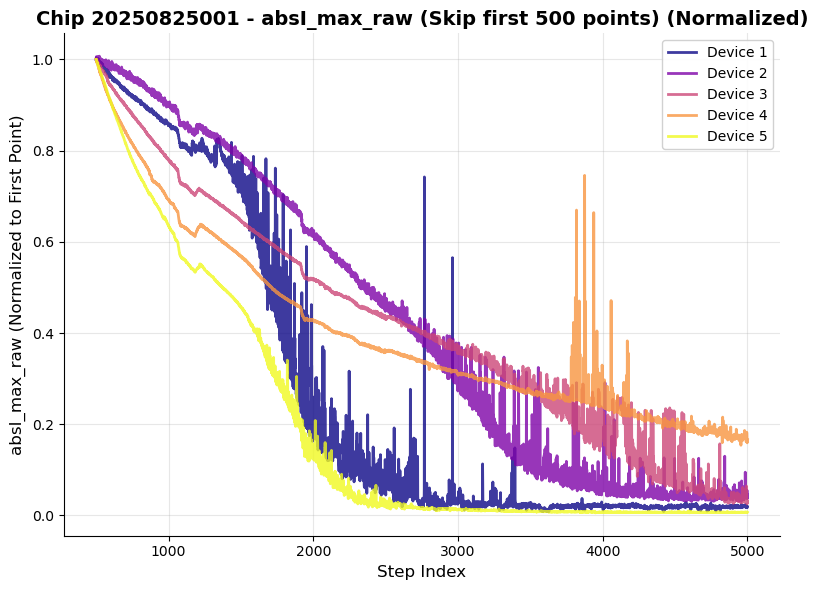

In [16]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=500,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


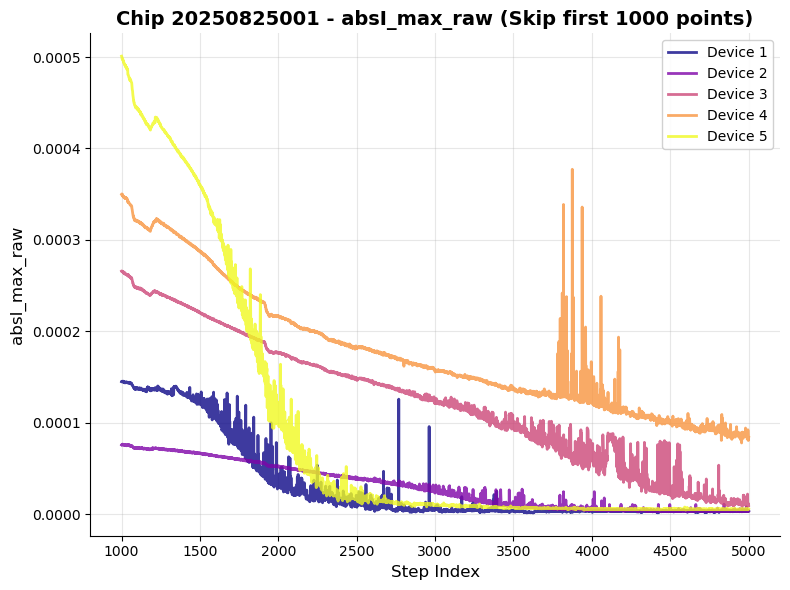

In [17]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1000,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


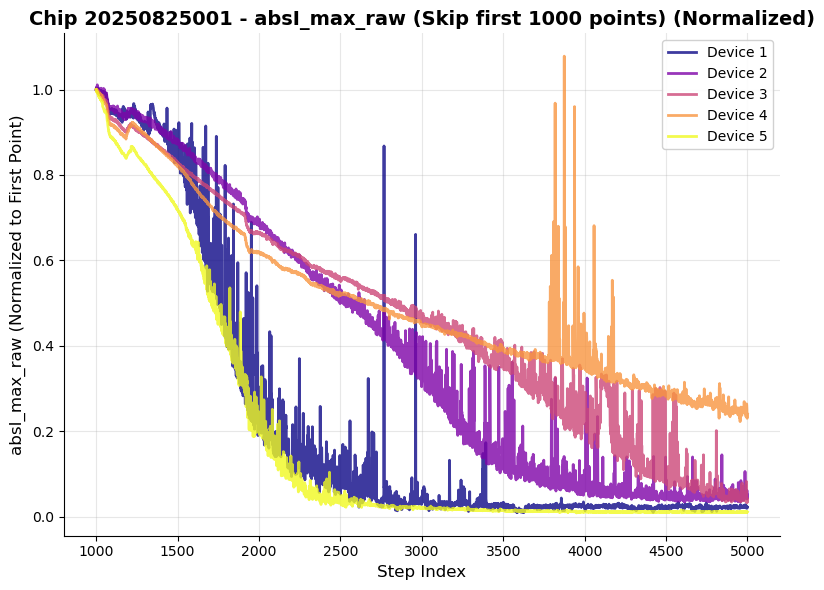

In [18]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1000,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


# absgm_max_forward

2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250825001 的特征 absgm_max_forward
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 5 个特征文件
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 5 个设备的数据
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.91e-05 ~ 2.52e-03
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.83e-05 ~ 2.59e-03
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 19:35:28 - chip_feature_plotter - INFO - chip_feat

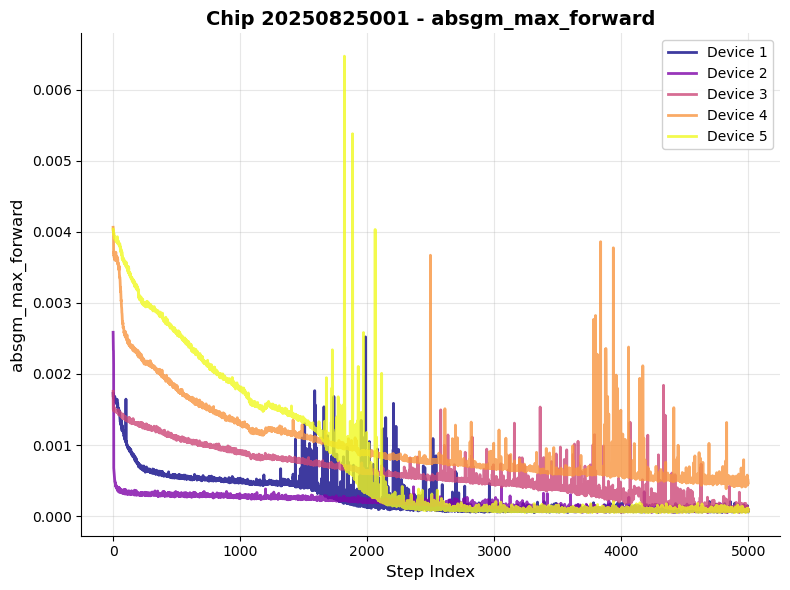

In [8]:
    
feature_name = 'absgm_max_forward'
chip_id = '20250825001'
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


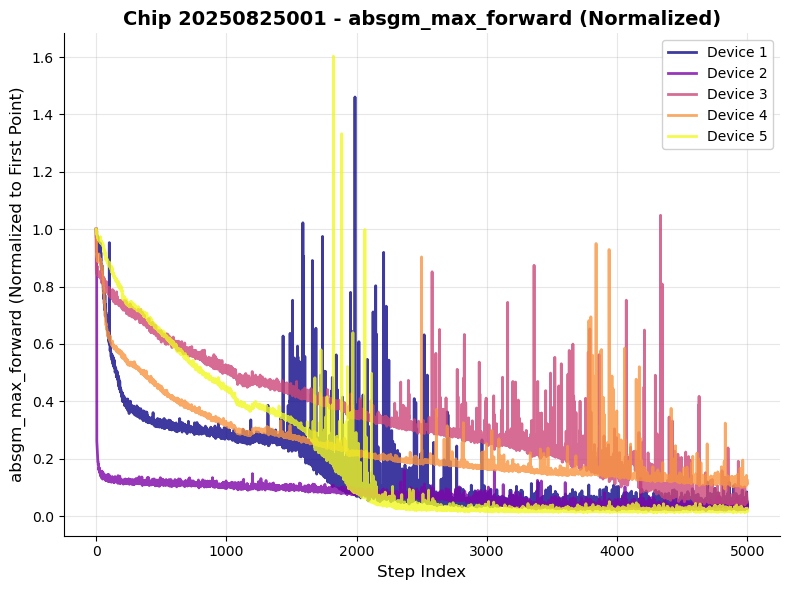

In [20]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

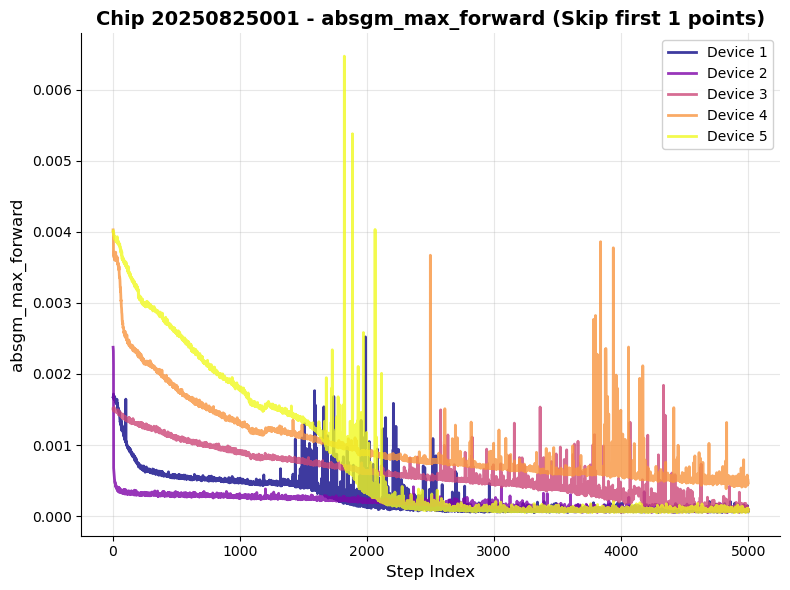

In [21]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)

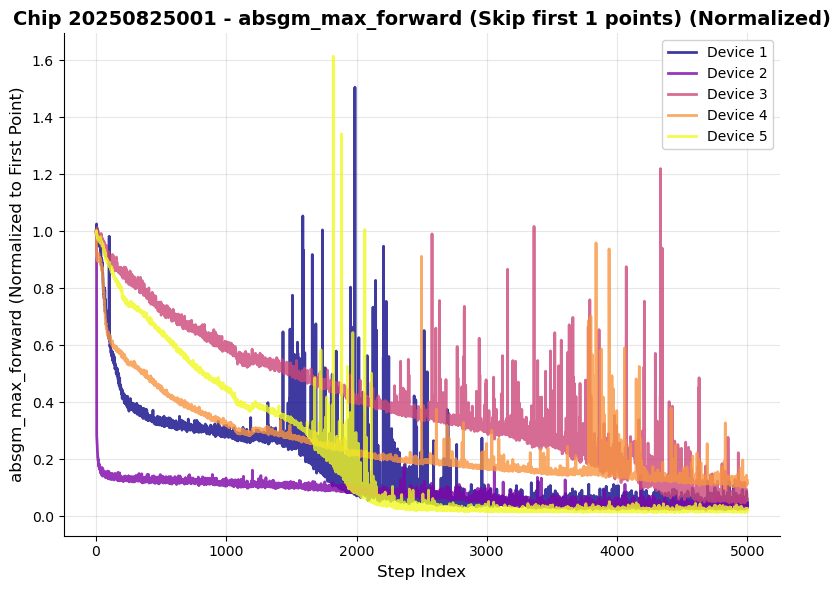

In [22]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

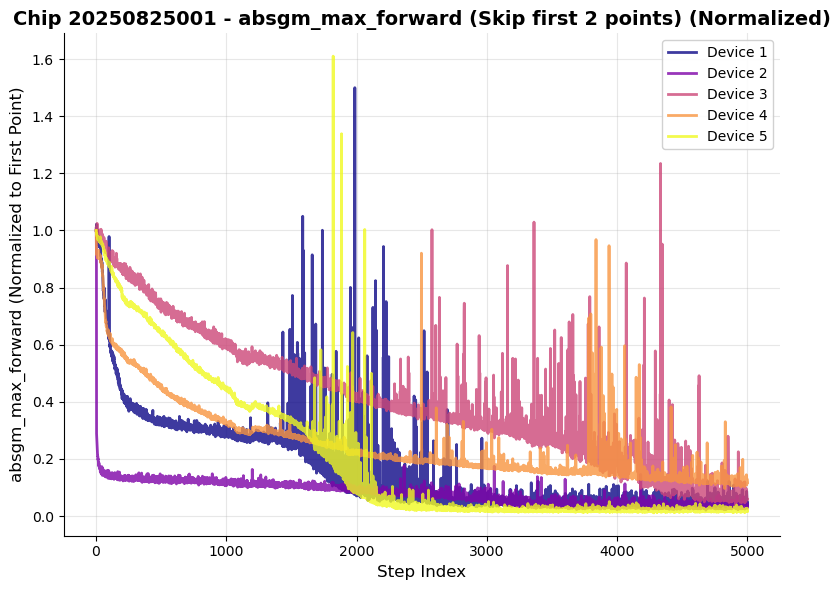

In [23]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=2,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250825001 的特征 absgm_max_forward
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 5 个特征文件
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 5 个设备的数据
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.91e-05 ~ 2.52e-03
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.83e-05 ~ 6.76e-04
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 19:35:33 - chip_feature_plotter - INFO - chip_feat

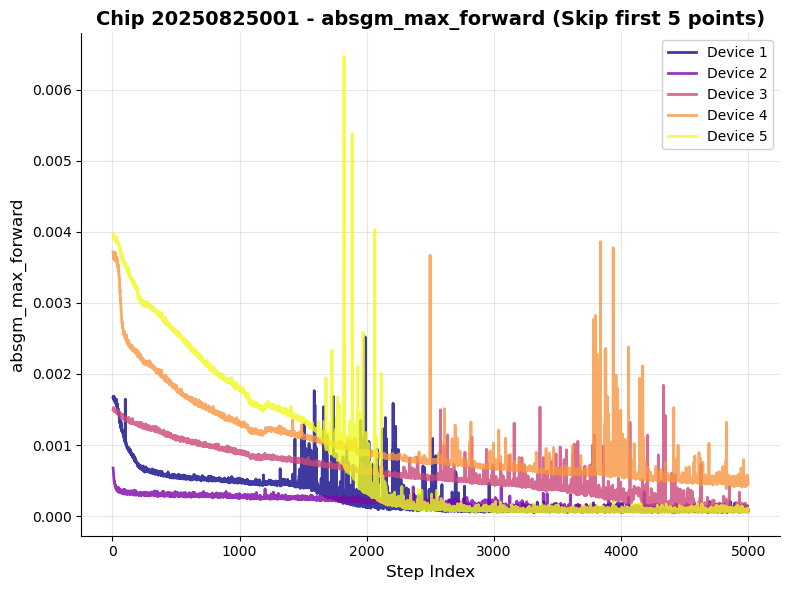

In [9]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)

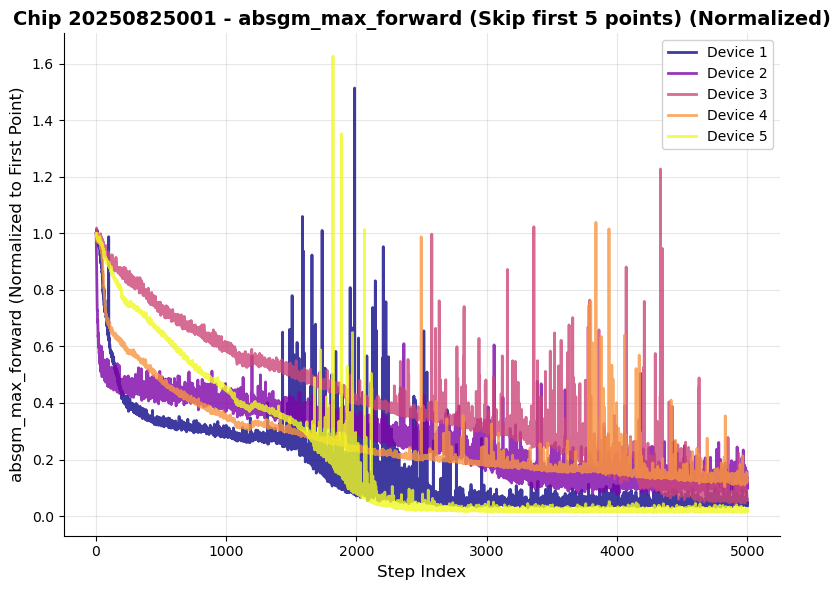

In [24]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

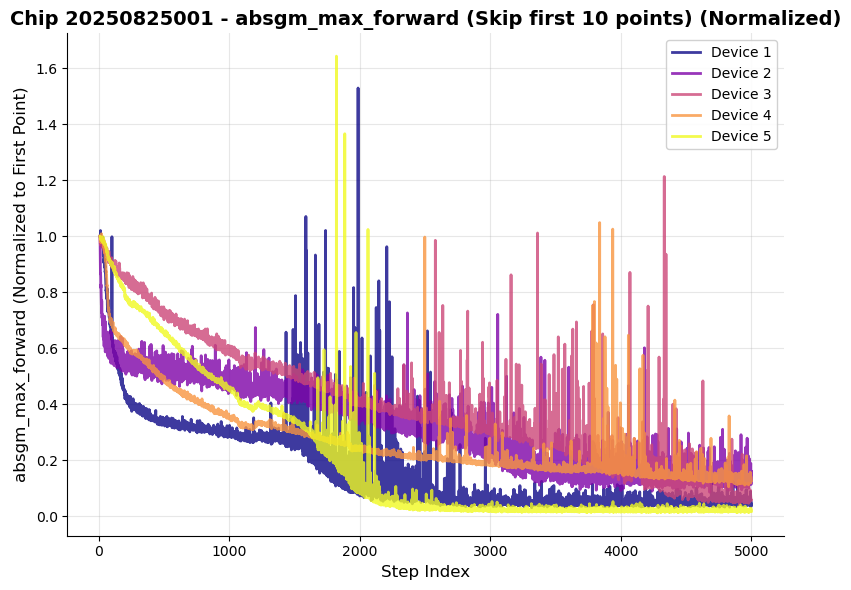

In [25]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=10,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

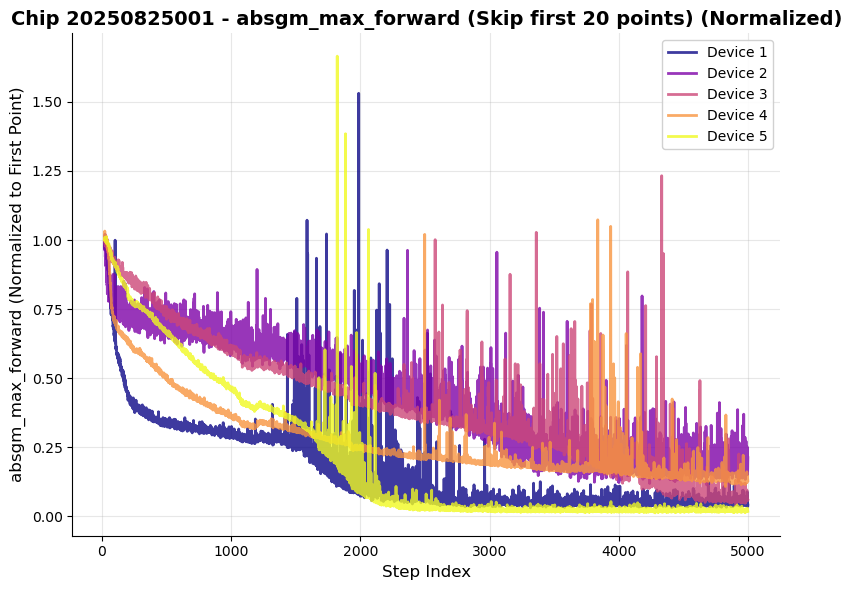

In [26]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=20,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

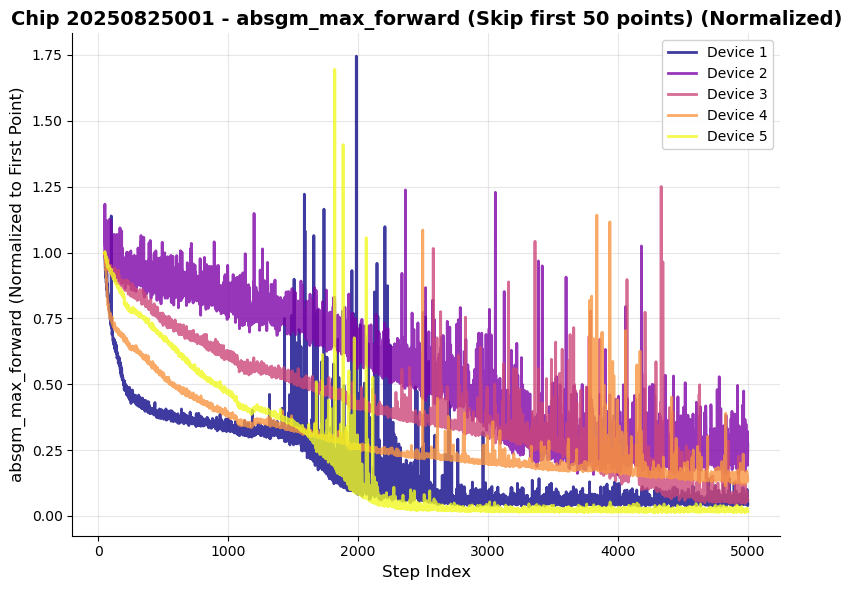

In [27]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=50,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

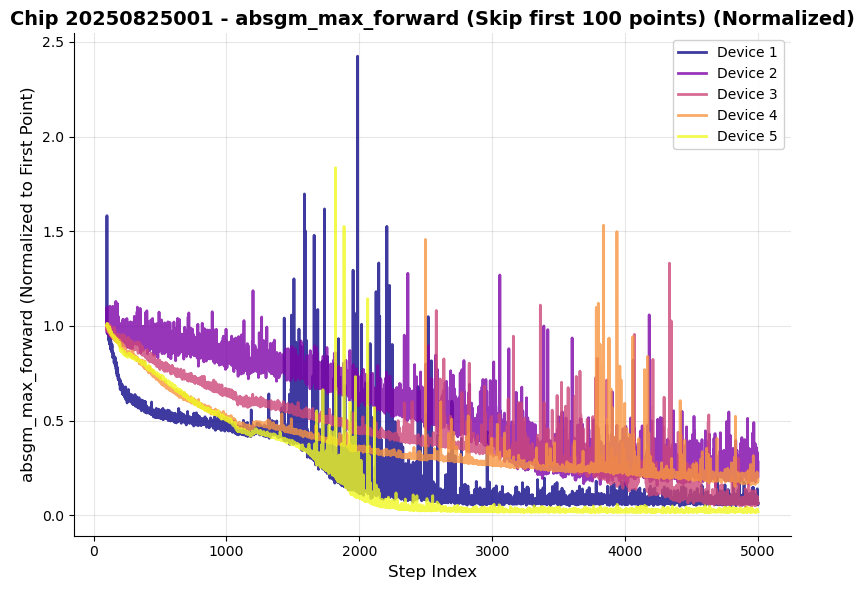

In [28]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=100,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

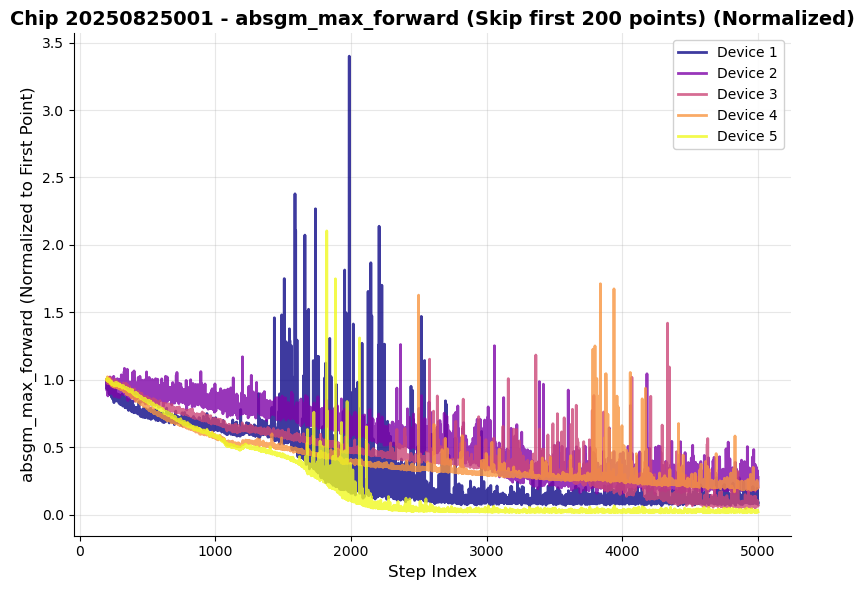

In [29]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

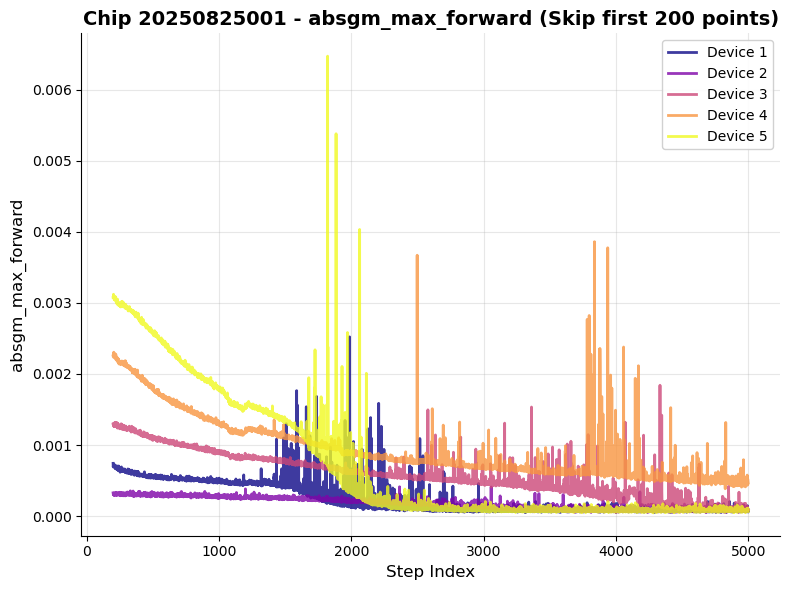

In [30]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)